In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Total Survive Count

In [7]:
def fun1(value):
    if(value==0):
        return "died"
    elif(value==1):
        return "survived"
df_survive=df.copy()
df_survive["Survived"]=df["Survived"].apply(fun1)
df_survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
survive_count=df_survive["Survived"].value_counts()
survive_count

Survived
died        549
survived    342
Name: count, dtype: int64

##### 549 people died and 342 people survived out of 891 people

<Axes: ylabel='count'>

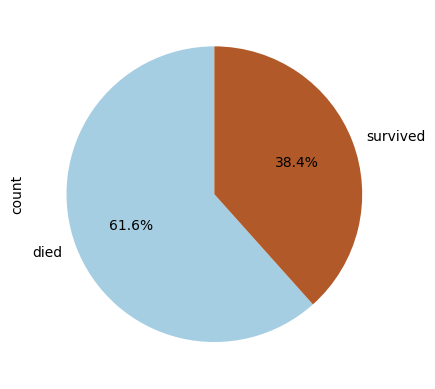

In [9]:
survive_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')

##### According to the pie chart, 38.4% of the passengers survived

### Survival by gender

In [10]:
gender_survival=df_survive.groupby(['Sex', 'Survived']).size()
gender_survival

Sex     Survived
female  died         81
        survived    233
male    died        468
        survived    109
dtype: int64

In [11]:
gender_male=df_survive[df_survive["Sex"]=='male']
gender_female=df_survive[df_survive["Sex"]=='female']

male_data=gender_male["Survived"].value_counts().reindex(['survived', 'died'])
female_data=gender_female["Survived"].value_counts().reindex(['survived', 'died'])
print(male_data, "\n", female_data)

Survived
survived    109
died        468
Name: count, dtype: int64 
 Survived
survived    233
died         81
Name: count, dtype: int64


Text(0.5, 1.0, 'Female Passengers')

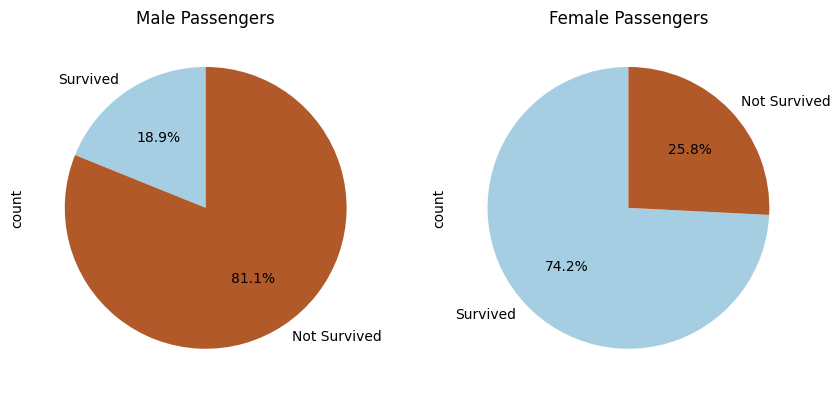

In [12]:
# Plotting two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for male passengers
male_data.plot(kind='pie', autopct='%1.1f%%', cmap='Paired', ax=axes[0], labels=['Survived', 'Not Survived'], startangle=90)
axes[0].set_title('Male Passengers')
# Pie chart for female passengers
female_data.plot(kind='pie', autopct='%1.1f%%', cmap='Paired', ax=axes[1], labels=['Survived', 'Not Survived'], startangle=90)
axes[1].set_title('Female Passengers')

##### As we know women and children were rescued first, hence women survived more than men

### Survival by Age

In [13]:
df_survive.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,died,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,died,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,died,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,survived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
df_survive["Age"]=pd.to_numeric(df_survive["Age"])

In [15]:
def fun2(value):
    if pd.isna(value):
        return "N/A"
    elif(value<18):
        return "Children"
    elif(value<=60):
        return "Adult"
    else:
        return "Old Aged"

df_survive["Age"]=df_survive["Age"].apply(fun2)
df_survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


In [16]:
df_survive['Age'].value_counts()

Age
Adult       579
N/A         177
Children    113
Old Aged     22
Name: count, dtype: int64

In [17]:
age_survive=df_survive[df_survive["Survived"]=='survived']
age_died=df_survive[df_survive["Survived"]=='died']

survive_data=age_survive["Age"].value_counts().reindex(['Adult', 'Children', 'N/A', 'Old Aged'])
died_data=age_died["Age"].value_counts().reindex(['Adult', 'Children', 'N/A', 'Old Aged'])

Text(0.5, 1.0, 'Died')

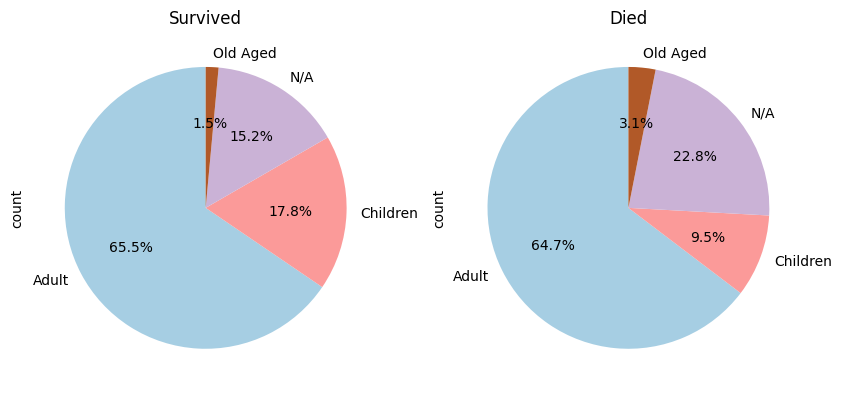

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


survive_data.plot(kind='pie', autopct='%1.1f%%', cmap='Paired', ax=axes[0], labels=['Adult', 'Children', 'N/A', 'Old Aged'], startangle=90)
axes[0].set_title('Survived')
died_data.plot(kind='pie', autopct='%1.1f%%', cmap='Paired', ax=axes[1], labels=['Adult', 'Children', 'N/A', 'Old Aged'], startangle=90)
axes[1].set_title('Died')

### Survival by PClass

In [19]:
df_survive.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,died,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,died,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S
5,6,died,3,"Moran, Mr. James",male,N/A,0,0,330877,8.4583,NaN,Q
6,7,died,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S
7,8,died,3,"Palsson, Master. Gosta Leonard",male,Children,3,1,349909,21.0750,NaN,S
8,9,survived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,11.1333,NaN,S
9,10,survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Children,1,0,237736,30.0708,NaN,C


In [20]:
pclass_survived=df_survive.groupby(['Pclass','Survived']).size()
pclass_survived

Pclass  Survived
1       died         80
        survived    136
2       died         97
        survived     87
3       died        372
        survived    119
dtype: int64

<Axes: xlabel='Pclass,Survived'>

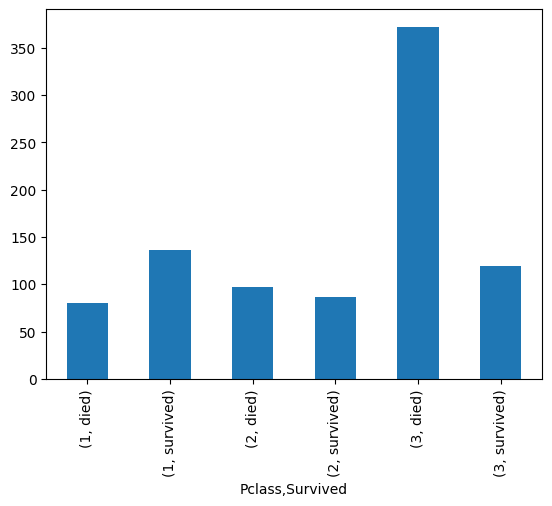

In [21]:
#pclass_survived.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')
pclass_survived.plot(kind='bar')

##### Passengers of Pclass 1 had survival rate than passengers in Pclass 3